# Matrix Review

In [ ]:
import numpy as np 
import matplotlib.pylab as plt

from sklearn.decomposition import PCA
from sympy import Matrix, init_printing, Symbol
from numpy.linalg import qr, eig, inv, matrix_rank, inv, norm
from scipy.linalg import null_space
init_printing()

In [3]:
## HELPER FUNCTIONS
def plot_2da(dict_):
    for key, value in dict_.items():
        plt.scatter(value[:, 0], value[:, 1],label=key)
    plt.legend()
    plt.show()
    
def plot_2db(dict_):
    for key, value in dict_.items():
        if value.shape[0]>2:
            plt.scatter(value[:, 0], value[:, 1],label=key)
        else:
            print(value)
            plt.quiver([0],[0],value[:,0],value[:,1],label=key)
    plt.legend()
    plt.show()

## Matrices and visualization

A matrix is an object with two indices, usually displayed in a n x m table format. Below we display a 2x2 matrix, which has 4 values.

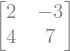

In [ ]:
A = np.array([[2,-3],[4,7]])
Matrix(A)

It is easy to extract columns and rows from matrices by using numpy slicing notation. From which we can see that in numpy matrices are stored in row-major order.

In [8]:
row = A[0, :]
row

array([ 2, -3])

In [7]:
col = A[:, 0]
col

array([2, 4])

We can also easily take the transpose of a numpy matrix (the transpose switches indices ij -> ji).

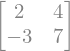

In [9]:
AT = A.T
Matrix(AT)

### Rank

The rank of a matrix is the number of dimensions of the rows of the matrix. The rank is found by counting the number of linearly independent vectors spanning the matrix and is a measure of the dimensionality of the vector space the matrix is associated with.

Numpy has utility functions for this

In [10]:
matrix_rank(A)

np.int64(2)

We can also plot the two vectors that make up our matrix and easily see that they are linearly independent. There is no way to transform one into the other by scaling and the entire 2D vector space is reachable by using linear combinations of the two vectors.

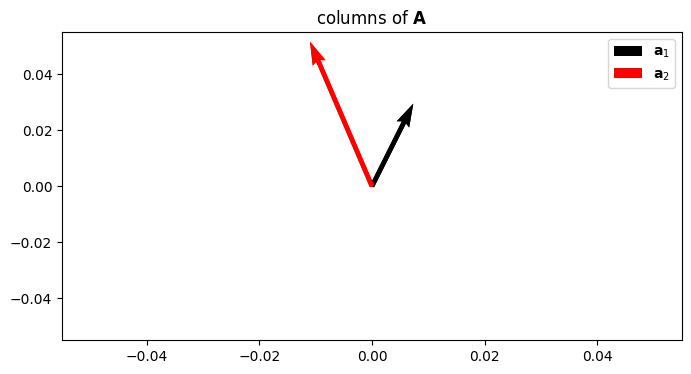

In [13]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=30,label="$\\mathbf{a}_{1}$")
ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=30,label="$\\mathbf{a}_{2}$",color='red')
plt.title("columns of $\\mathbf{A}$ ")
plt.legend()
plt.show()

Let's illustrate the 2D case with a matrix with linear dependent entries. As you can see, the rank of the matrix is now 1, because there is 

In [ ]:
F = np.array([[2,4],[4,8]])
matrix_rank(F)

np.int64(1)

Plotted as arrows, they are clearly pointing in the same direction, it is impossible to deviate from this direction by making any type of linear combination of these vectors.

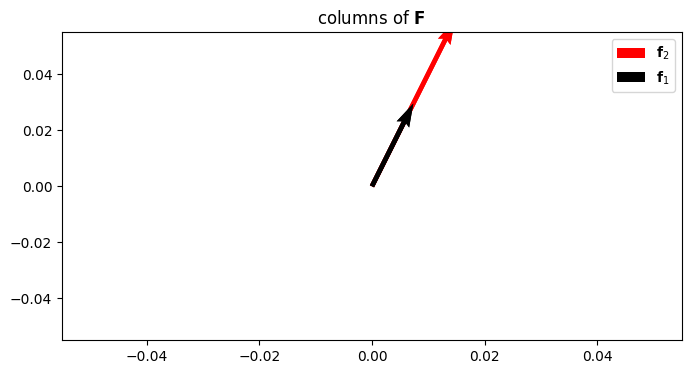

In [16]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.quiver([0, 0],[0, 0],F[0,1], F[1,1],scale=30,label="$\\mathbf{f}_{2}$",color='red')
ax.quiver([0, 0],[0, 0],F[0,0], F[1,0],scale=30,label="$\\mathbf{f}_{1}$")
plt.title("columns of $\\mathbf{F}$ ")
plt.legend()
plt.show()

In 2D, linear independence is easy to see since any two non-parallel vectors are linearly independent. In higher dimensions this gets more complicated since linear combinations of the vectors might evaluate to one of the other vectors. 

In general, a vector space in N dimensions can be spanned completely by N N-dimensional vectors that are linearly independent. Any other case will not be able to span the space (\<N vectors or \<N dimension) or will have linear dedendent combinations (\>N vectors). Using \>N dimensions will be able to span the space as a subspace.

Below an example is shown where one column is the linear combination of the other two columns where the rank of a 3x3 matrix evaluates to 2.

In [17]:
G=np.array([[2,4,6],[6,4,2],[16,16,16]])
matrix_rank(G)

np.int64(2)

In the other direction we might have more dimensions than vectors. In this case the rank cannot be higher than the number of vectors.

Below we can see that the rank of a matrix of 2 column vectors in 3D space has rank 2. In other words, we can only describe points in a 2D subspace because we don't have enough components available to span the complete 3D space.

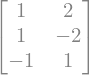

'rank = 2'

In [22]:
F=np.array([[1,2],[1,-2],[-1,1]])
display(Matrix(F))
f"rank = {matrix_rank(F)}"

This can be visualised in a 3D plot below.

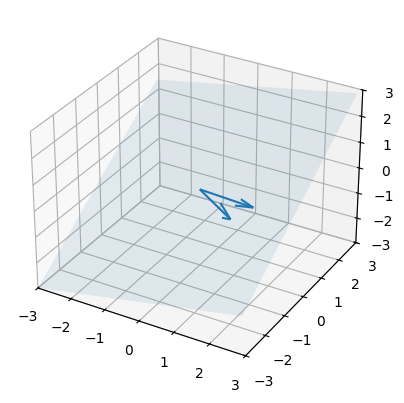

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
p = null_space(F.T)
xx, yy = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))
z = (p[0]*xx+p[1]*yy)/p[2]
ax.plot_surface(xx, yy, z, alpha=0.1)
ax.quiver([0,0], [0,0], [0,0], F[0,:], F[1,:], F[2,:])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
plt.show()

### The Frobenius Norm

This norm is a measure of the magnitude of a matrix and is similar to the euclidean norm. For each entry in the matrix the value is squared, added together. Then we take the square root.

This is analogous to flattening the matrix and taking the standard euclidean norm. It is also equal to the square root of the trace of the matrix.

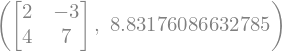

In [25]:
Matrix(A), norm(A)

Explicitly, the norm can be calculated as:

In [26]:
m, n = A.shape[0], A.shape[1] # get number of rows and columns 
sumsquares = 0

for i in range(m):
    for j in range(n):
        sumsquares += A[i,j] ** 2
np.sqrt(sumsquares)

### Adding matrices and types of matrices

Two matrices of size (a, b) and (c, d) can only be added together if a==c and b==d. Then we can perform element-wise addition of each entry.

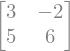

In [ ]:
B = np.array([[1,1],[1,-1]])
C = A + B
Matrix(C)

If a matrix is an N x N matrix, we can create a symmetric matrix by adding a matrix to it's own transpose

In [30]:
C = np.random.randn(2,2)
S = C + C.T
np.all(S == S.T)

np.True_

Numpy also allows the creation of diagonal matrices with the `eye()` function

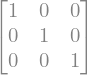

In [32]:
Matrix(np.eye(3).astype(int))

## Matrix and Vector operations

### Dot product

In numpy we use `@` for matrix multiplication. In the case of two vectors, this reduces to the dot product.

The standard multiplication operator is used for element-wise multiplication.

While it is not necessary in this case due to numpy interpreting the dimensions (we explicitly pass it a 1darray, which is read as a vector). Technically we need to transpose the first vector into a row vector.

In [ ]:
a = np.array([1,1])
b = np.array([1,2])

a.T@b

np.int64(3)

### Outer product

The outer product is another way to multiply vectors and matrices. When we pass a 2darray to the `@` operator, the operator knows to interpret the input as a matrix and will automatically choose the correct way of multiplication, as long as the dimensions match.

In [45]:
u = np.array([[1],[2],[3],[4]])
v = np.array([[0],[1],[2],[3]])

u@v.T

array([[ 0,  1,  2,  3],
       [ 0,  2,  4,  6],
       [ 0,  3,  6,  9],
       [ 0,  4,  8, 12]])

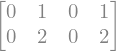

np.int64(1)

In [59]:
u = np.array([[1],[2]])
U = u@np.array([[0,1,0,1]])
display(Matrix(U))
matrix_rank(U)

### Matrix and vector multiplication

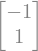

In [60]:
x = np.array([1,1])
A = np.array([[0,-1],[1,0]])
b = A @ x
Matrix(b)

### Rotation matrix

A is a special case of a rotation matrix where $\theta = 90\degree$

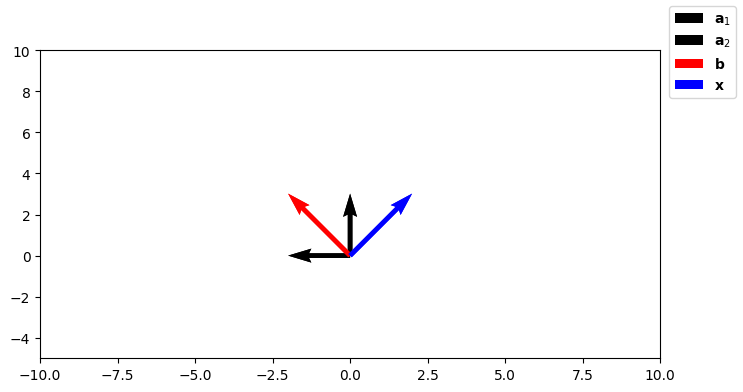

In [63]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.quiver([0, 0],[0, 0],A[0,0], A[1,0],scale=10,label="$\\mathbf{a}_{1}$")
ax.quiver([0, 0],[0, 0],A[0,1], A[1,1],scale=10,label="$\\mathbf{a}_{2}$")
ax.quiver([0,0],[0,0],b[0], b[1],scale=10,label="$\\mathbf{b}$",color='r')
ax.quiver([0,0],[0,0],x[0], x[1],scale=10,label="$\\mathbf{x}$",color='b')
ax.set_xlim([-10,10])
ax.set_ylim([-5,10])
fig.legend()
plt.show()

### Multiplying Matrices

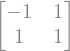

In [64]:
C=A@B
Matrix(C)

If a matrix is full rank it can be inverted.

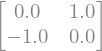

In [65]:
A_inv = inv(A)
Matrix(A_inv)

And multiplying a matrix with it's inverse gives the identity matrix

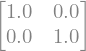

In [67]:
Matrix(A @ A_inv)

## Orthogonal Matrix

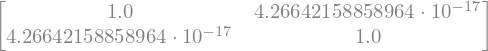

In [68]:
Q = np.array([[1,1],[1,-1]])*2**(-1/2)
I = Q @ Q.T
Matrix(I)

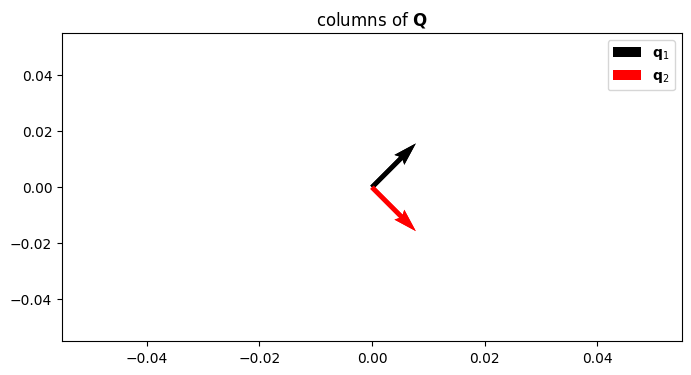

In [71]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.quiver([0, 0],[0, 0],Q[0,0], Q[1,0],scale=10,label="$\\mathbf{q}_{1}$")
ax.quiver([0, 0],[0, 0],Q[0,1], Q[1,1],scale=10,label="$\\mathbf{q}_{2}$",color='red')
plt.title("columns of $\\mathbf{Q}$ ")
plt.legend()
plt.show()

## Data as matrices

Usually the input data to an ML model can be represented as a matrix with each sample constituting a row and the features corresponding to columns.

In [73]:
samples = 200

u = np.array([[1.0,1.0],[0.10,-0.10]])/(2)**(0.5)

X_ = np.dot(4*np.random.randn(samples,2),u)+10
X_[:5]

array([[ 7.26596047,  7.3104199 ],
       [ 2.78521922,  3.18686635],
       [14.24161993, 13.66734745],
       [ 7.36929668,  8.42541172],
       [ 7.64834585,  7.19517908]])

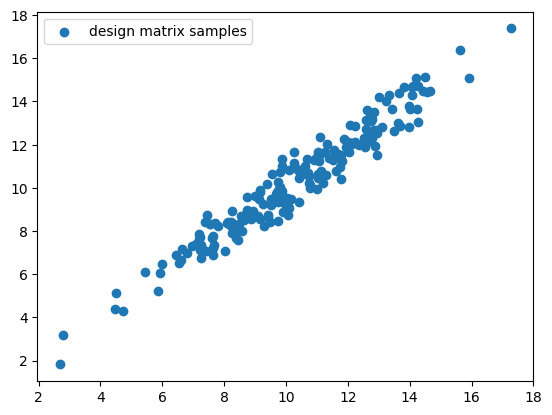

In [74]:
dict_={"design matrix samples":X_}
plot_2da(dict_)

In [76]:
N,D = X_.shape
print("number of samples {}, dimensions is {}".format(N,D))

number of samples 200, dimensions is 2


Interpreting data like this makes it easy to apply transformations, something that is extensively used in vectorized algorithms.

In [77]:
I = np.identity(N)
col1 = np.ones((1,N))
row1 = np.ones((N,1))/N
no_mean = (I-row1@col1)

X = no_mean@X_
print("mean of X",X.mean(axis=0))

mean of X [-1.94511074e-15  1.13464793e-15]


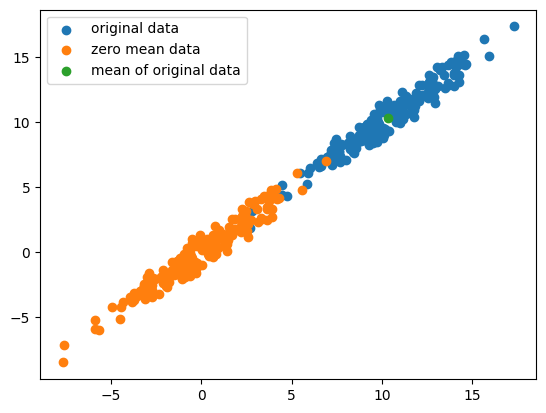

In [78]:
mean=(np.ones((1,N))/N)@X_
dict_={"original data":X_,"zero mean data":X,"mean of original data":mean}
plot_2da(dict_) 

Having the data without a mean makes it easy to calculate the covariance matrix using standard matrix operations

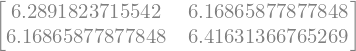

In [79]:
C = X.T@X/N
Matrix(C)

In [80]:
matrix_rank(C)

np.int64(2)

## Eigenvalues and eigenvectors

In [81]:
eigen_values , eigen_vectors = eig(A)

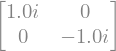

In [82]:
Matrix(np.diag(eigen_values))

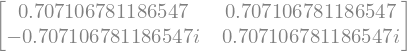

In [83]:
Matrix(eigen_vectors)

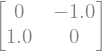

In [ ]:
A = np.round(
    eigen_vectors @ np.diag(eigen_values) @ inv(eigen_vectors),
    8
    )
Matrix(A)

## PCA Factorization

Eigen decomposition can only be applied to matrices that are full rank. However, even if a matrix is full rank, its Eigenvalues and Eigenvectors could be complex.

A practical example of the use of the symmetric matrix ($\mathbf{S}=\mathbf{S}^{T}$) is where you require the Eigenvalues to be real-valued and the Eigenvectors to be orthogonal. An example of this is seen in the covariance matrix $\mathbf{C}$ used in principal component analysis (PCA): $\mathbf{C}=\mathbf{V}\mathbf{\Lambda}\mathbf{V}^{T}$

In [85]:
eigen_values , eigen_vectors = eig(C)

In [86]:
v = eigen_vectors[:, np.argmax(eigen_values)].reshape(-1,1)
v

array([[-0.70345431],
       [-0.71074048]])

In [89]:
pca = PCA(n_components=1)
Z_sklearn = pca.fit_transform(X_)

# This will print True if the vectors are identical (ignoring the sign) and False otherwise
if np.isclose(Z,Z_sklearn).min():
    print(np.isclose(Z,Z_sklearn).min())
else:
    print(np.isclose(Z,-Z_sklearn).min())

True


In [90]:
pca = PCA(n_components=1)
X_transformed=pca.fit_transform(X)
X_=pca.inverse_transform(X_transformed)

In [92]:
Xhat=Z@v.T

[[-0.70345431 -0.71074048]]


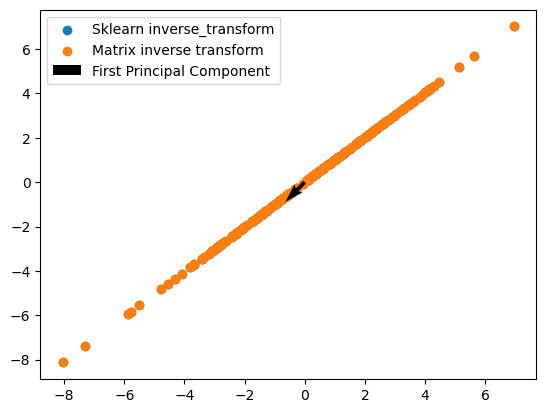

In [93]:
dict_ = {"Sklearn inverse_transform": X_, "Matrix inverse transform": Xhat, "First Principal Component": v.T}
plot_2db(dict_)